# Priority Queues

## Agenda

1. Motives
2. Naive implementation
2. Heaps
    - Mechanics
    - Implementation
    - Run-time Analysis
3. Heapsort

## 1. Motives
Prior to stacks & queues, the sequential data structures we implemented imposed an observable total ordering on all its elements, which were also individually accessible (e.g., by index).

Stacks & Queues restrict access to elements (to only 1 insertion/deletion point), thereby simplifying their implementation. They don't, however, alter the order of the inserted elements.

Data structures that impose a total ordering are useful — e.g., one that maintains all elements in sorted order at all times might come in handy — but their design and implementation are necessarily somewhat complicated. We'll get to them, but before that ...

Is there a middle ground? I.e., is there a place for a data structure that restricts access to its elements, yet maintains an implied (though not necessary total) ordering?

## 2. Naive implementation

In [26]:
class PriorityQueue:
    def __init__(self, key):
        self.data = []
        self.key = key
        
    def add(self, x): # O(n)
        if not self:
            self.data.append(x)
        else:
            # find the corrrect insertion spot
            for i in range(len(self)):
                if self.key(self.data[i]) < self.key(x):
                    # and insert
                    self.data.insert(i,x)
                    break
            else:
                self.data.append(x)
    
    def max(self):
        assert(self)
        return self.data[0]

    def pop_max(self):
        assert(self)
        return self.data.pop(0)
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [33]:
pq = PriorityQueue(key = lambda x:-x)

In [34]:
import random
for _ in range(10):
    pq.add(random.randrange(100))

In [35]:
pq

[24, 32, 33, 44, 53, 67, 71, 84, 85, 96]

In [ ]:
while pq:
    print(pq.pop_max())

## 3. Heaps

### Mechanics

### Implementation

In [9]:
class Heap:
    def __init__(self):
        self.data = []
    
    @staticmethod
    def _parent(idx):
        return (idx-1)//2
        
    @staticmethod
    def _left(idx):
        return idx*2+1

    @staticmethod
    def _right(idx):
        return idx*2+2
    
    def add(self, x):
        self.data.append(x)
        idx = len(self.data) - 1
        par = Heap._parent(idx)
        while idx > 0 and self.data[par] < self.data[idx]:
            self.data[par], self.data[idx] = self.data[idx], self.data[par]
            idx, par = par, Heap._parent(par)
        
    def max(self):
        assert(self)
        return self.data[0]
    
    def _heapify(self, idx=0):
        l_idx = Heap._left(idx)
        r_idx = Heap._right(idx)
        while True:
            max_idx = idx
            if l_idx < len(self.data) and self.data[max_idx] < self.data[l_idx]:
                max_idx = l_idx
            if r_idx < len(self.data) and self.data[max_idx] < self.data[r_idx]:
                max_idx = r_idx
            if max_idx != idx:
                self.data[max_idx], self.data[idx] = self.data[idx], self.data[max_idx]
                idx = max_idx
                l_idx = Heap._left(max_idx)
                r_idx = Heap._right(max_idx)
            else:
                break
                
    def pop_max(self):
        assert(self)
        ret = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1]
        self._heapify()
        return ret
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [10]:
h = Heap()

In [ ]:
import random
for _ in range(10):
    val = random.randrange(100)
    print(val)
    h.add(val)

In [ ]:
h

In [ ]:
while h:
    print(h.pop_max())

### Run-time Analysis

- max: O(1)
- add: $O (\log_2 N)$
- pop_max: $O (\log_2 N)$

## 4. Heapsort

In [11]:
def heapsort(iterable): # => O(N log N)
    heap = Heap() # O(1)
    for x in iterable: # loops N times => O(N log N)
        heap.add(x) # each invocation takes O(log N)
    l = [] # O(1)
    while heap: # loops N times => O(N log N)
        l.append(heap.pop_max()) # each pop_max is O(log N)
    l.reverse() # O(N)
    return l # O(1)

In [12]:
import random
to_sort = list(range(20))
random.shuffle(to_sort)
to_sort

[18, 1, 11, 17, 13, 7, 16, 19, 6, 8, 3, 4, 2, 14, 15, 10, 12, 5, 0, 9]

In [13]:
heapsort(to_sort)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [14]:
import random

def pairs(iterable):
    it = iter(iterable)
    a = next(it)
    while True:
        b = next(it)
        yield a,b
        a = b

lst = heapsort(random.random() for _ in range(1000))
all((a <= b) for a, b in pairs(lst))

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: generator 'pairs' raised StopIteration


True

In [15]:
import timeit
def time_heapsort(n):
    return timeit.timeit('heapsort(rlst)',
                         'from __main__ import heapsort; '
                         'import random; '
                         'rlst = (random.random() for _ in range({}))'.format(n),
                         number=1000)

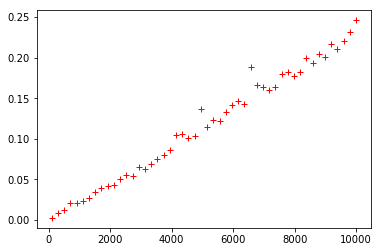

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.show()

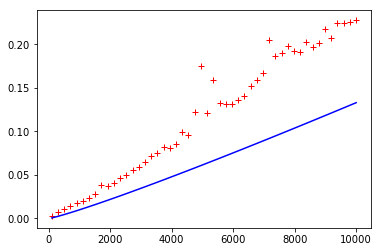

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.plot(ns, ns*np.log2(ns)*0.01/10000, 'b') # O(n log n) plot
plt.show()